In [5]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB # modele d'exemple a modifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle

In [6]:
# Import data
data = pd.read_csv('data/train_diabetes_health_indicators.csv')
data['Diabetes_012'] = data['Diabetes_012'].astype(int)
data = data.drop(columns=['Unnamed: 0'])
X = data.drop(columns=['Diabetes_012'])
y = data['Diabetes_012']


In [7]:
# Data Exploring

# Analyse data

data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,2,1,1.0,1,32.0,1.0,0.0,1.0,1,1,...,1,0.0,2.0,15.0,0.0,0.0,1,7,6.0,6.0
1,0,0,1.0,1,28.0,0.0,0.0,0.0,0,0,...,1,0.0,4.0,4.0,30.0,0.0,0,10,6.0,7.0
2,0,0,1.0,1,24.0,1.0,0.0,0.0,1,0,...,1,0.0,2.0,0.0,0.0,0.0,0,12,5.0,6.0
3,2,1,1.0,1,38.0,0.0,0.0,0.0,1,0,...,1,0.0,3.0,0.0,0.0,0.0,1,7,6.0,8.0
4,0,0,1.0,1,30.0,0.0,0.0,0.0,0,0,...,0,1.0,4.0,10.0,0.0,0.0,0,5,3.0,7.0


In [8]:
data.shape

(47276, 22)

In [9]:
data.duplicated().sum()

768

In [10]:
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,...,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000
mean,0.305800,0.419325,0.401980,0.964337,28.939081,0.408114,0.038265,0.085752,0.781284,0.619807,...,0.962899,0.062696,2.473560,3.929245,3.761126,0.152720,0.476986,7.887829,5.142482,6.931191
std,0.703757,0.493454,0.490303,0.185450,6.562661,0.491490,0.191837,0.280000,0.413380,0.485439,...,0.189012,0.242417,1.027017,7.861948,8.239428,0.359721,0.499475,3.227736,0.945945,2.376979
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,4.000000,2.000000,0.000000,1.000000,10.000000,6.000000,9.000000
max,2.000000,1.000000,1.000000,1.000000,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000


In [11]:
data.nunique()

Diabetes_012             3
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     74
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                30
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                  11
dtype: int64

In [12]:
data.dtypes

Diabetes_012              int64
HighBP                    int64
HighChol                float64
CholCheck                 int64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity              int64
Fruits                    int64
Veggies                   int64
HvyAlcoholConsump         int64
AnyHealthcare             int64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                       int64
Age                       int64
Education               float64
Income                  float64
dtype: object

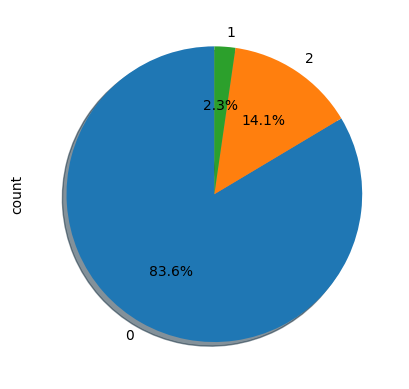

In [13]:
data["Diabetes_012"].value_counts().plot.pie( autopct='%1.1f%%',shadow=True, startangle=90);


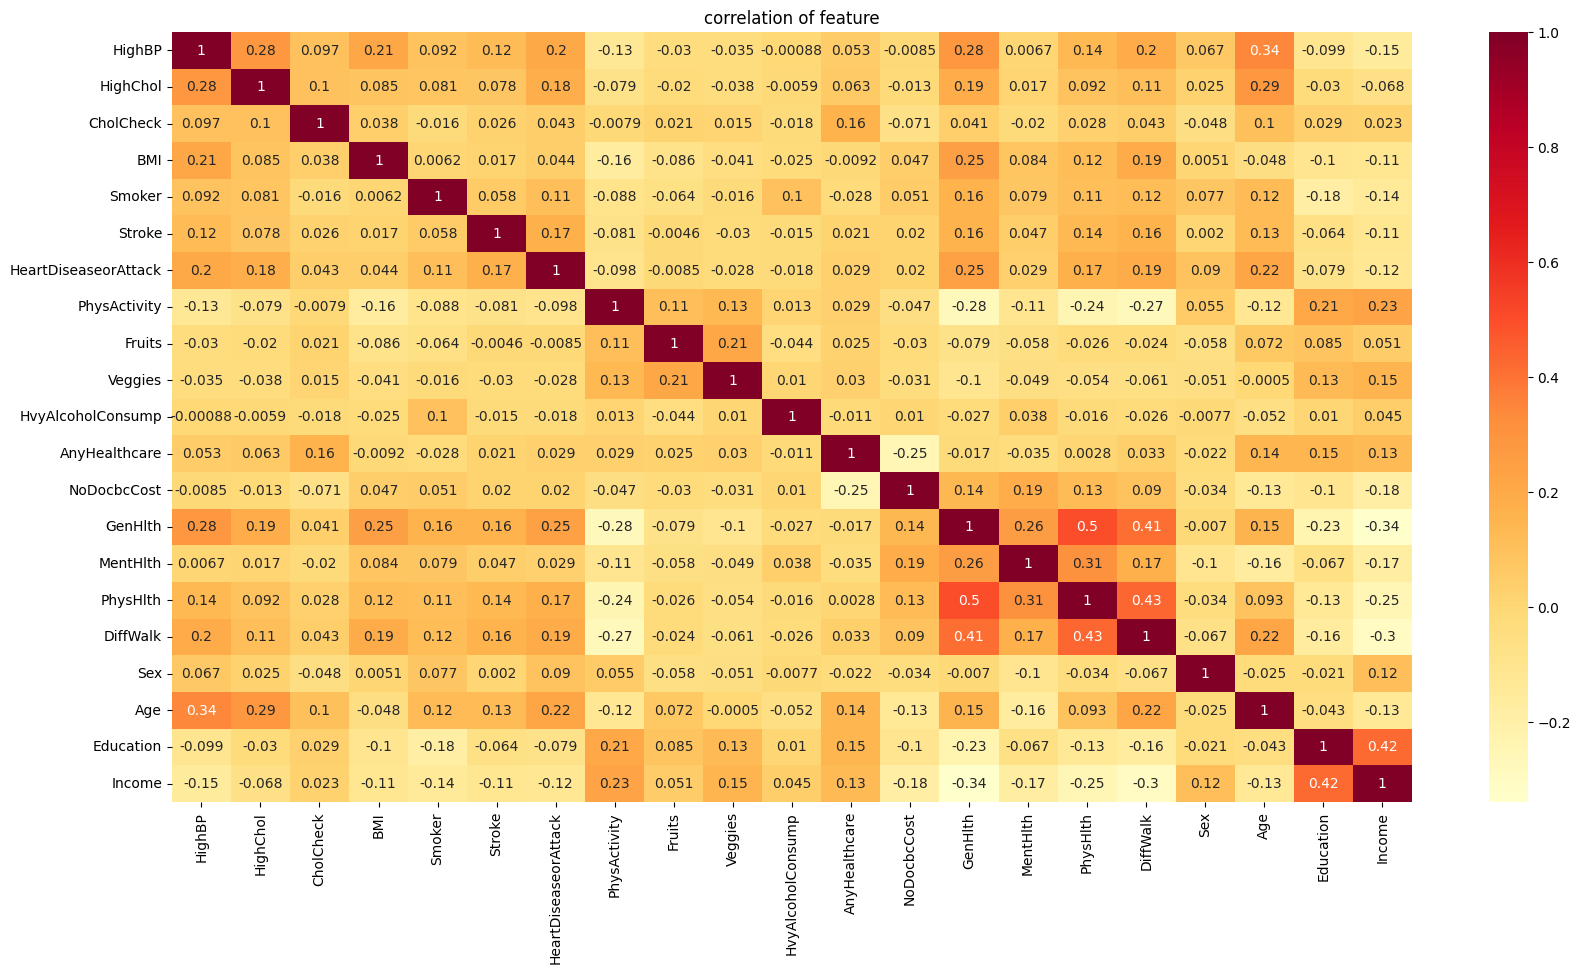

In [14]:
plt.figure(figsize = (20,10))
sns.heatmap(X.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")
plt.show()

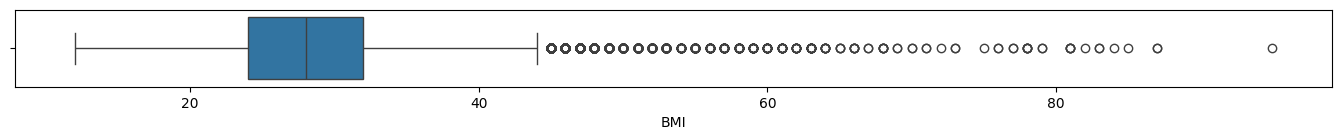

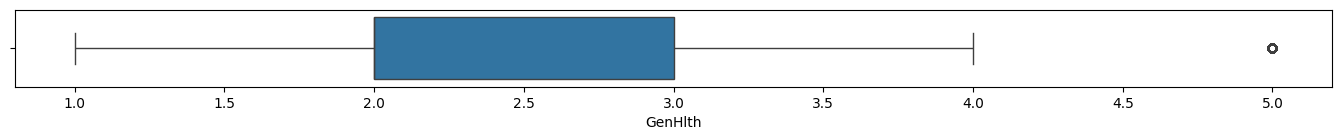

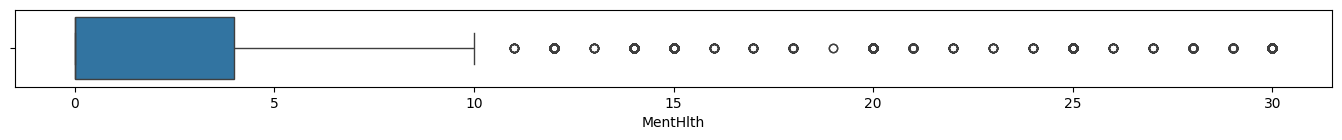

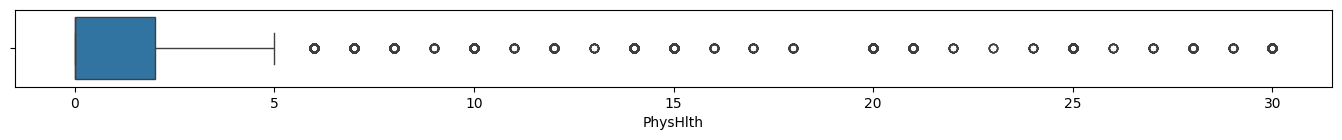

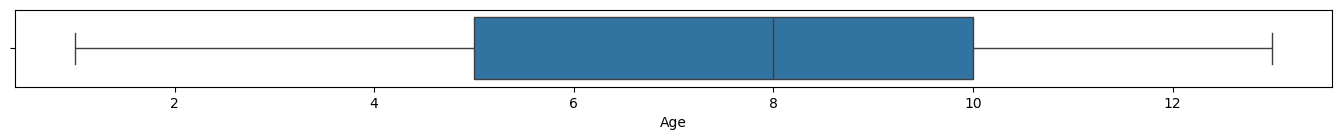

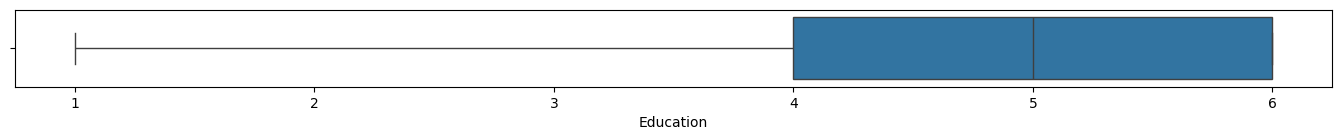

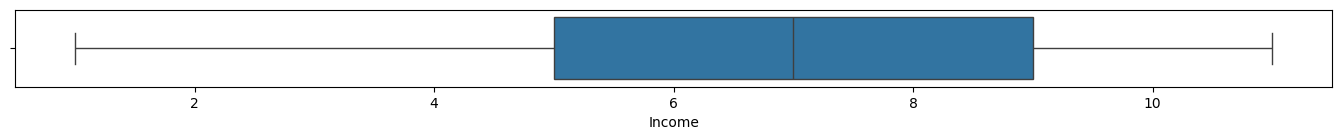

In [15]:
# BOX plot
import matplotlib.pyplot as plt

for column in data:
        if(data[column].nunique()>3):
                plt.figure(figsize=(17,1))
                sns.boxplot(data=data, x=column)

In [16]:
# Remove outliers 
data=data[data["BMI"]>45]
data=data[data["GenHlth"]>4]
data=data[data["MentHlth"]>10]
data=data[data["PhysHlth"]>5]


In [18]:
### Feature Selection (Pearson Correlation) and split data
from scipy.stats import pearsonr
pearson_list = []
for l in list(X.columns):
    p,_ = pearsonr(X[l], y)
    pearson_list.append(abs(p))
    
p_value=pd.Series(pearson_list,index=X.columns)
p_value.sort_values(ascending=False,inplace=True)
high_score_features_pearson = list(p_value.index[:15]) #we took only 15 features
print(high_score_features_pearson)

X=X[high_score_features_pearson]

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

['GenHlth', 'HighBP', 'BMI', 'DiffWalk', 'HighChol', 'Age', 'HeartDiseaseorAttack', 'PhysHlth', 'Income', 'PhysActivity', 'Education', 'Stroke', 'CholCheck', 'HvyAlcoholConsump', 'Smoker']


In [19]:
# UNDER Sampling   equilibrage data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

random_under_sampler = RandomUnderSampler(random_state=42)
X_train, y_train =random_under_sampler.fit_resample(X_train, y_train)

Text(0, 0.5, 'Count')

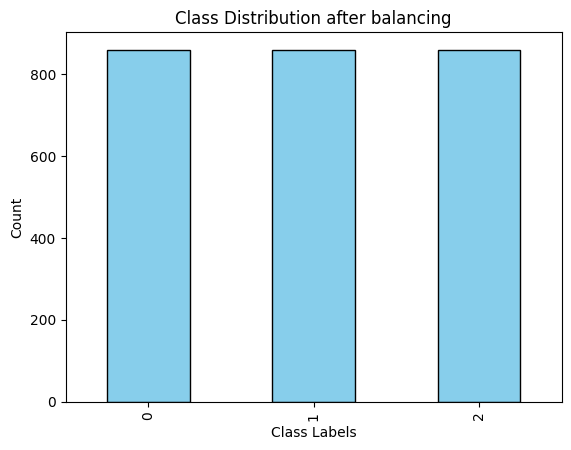

In [20]:
#show
y_train.value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Class Distribution after balancing')
plt.xlabel('Class Labels')
plt.ylabel('Count')

In [21]:
### Normalisation
from sklearn.preprocessing import StandardScaler

# Supposons que X_train et X_test sont vos ensembles de données d'entraînement et de test respectivement

# Initialisez le StandardScaler
scaler = StandardScaler()

# Calculez la moyenne et l'écart type sur X_train
scaler.fit(X_train)

# Transformez X_train et X_test en utilisant la standardisation
X_train_standardized = scaler.transform(X_train)
X_test_standardized = scaler.transform(X_test)


In [23]:
from sklearn.svm import SVC
#fit
# Initialize the model
#---- à modifier en utilisant l'un des trois modeles : SVM, RandomForest et GradientBoosting ----
clf = SVC(kernel='rbf')

# Train the model
clf.fit(X_train, y_train)

SVC()

In [24]:
# Predict on test data
pred = clf.predict(X_test)

In [25]:
# Evaluate model predictions
print(f'Classification_report:\n {classification_report(y_test,pred)}')

Classification_report:
               precision    recall  f1-score   support

           0       0.94      0.65      0.76      7899
           1       0.03      0.26      0.06       220
           2       0.33      0.57      0.42      1337

    accuracy                           0.63      9456
   macro avg       0.43      0.49      0.41      9456
weighted avg       0.83      0.63      0.70      9456



In [26]:
# grid search 
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report





# Définir les paramètres à tester dans la recherche sur grille
param_grid = {
    #'C': [0.1, 1, 10, 100],
    #'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Créer un modèle SVM
svm_model = SVC()

# Créer un objet GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Exécuter la recherche sur grille sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Extraire les meilleurs paramètres
best_params = grid_search.best_params_
print("Meilleurs paramètres:", best_params)

# Extraire le meilleur modèle
best_model = grid_search.best_estimator_

# Faire des prédictions sur l'ensemble de test avec le meilleur modèle
y_pred = best_model.predict(X_test)

# Évaluer la précision du modèle
accuracy = best_model.score(X_test, y_test)
print("Accuracy:", accuracy)

# Autres métriques d'évaluation
print(classification_report(y_test, y_pred))


Meilleurs paramètres: {'kernel': 'linear'}
Accuracy: 0.6351522842639594
              precision    recall  f1-score   support

           0       0.94      0.66      0.78      7899
           1       0.04      0.36      0.07       220
           2       0.36      0.52      0.43      1337

    accuracy                           0.64      9456
   macro avg       0.45      0.51      0.43      9456
weighted avg       0.84      0.64      0.71      9456



In [27]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
# Créer un modèle SVM

svm_model = SVC() 

# Effectuer une validation croisée sur l'ensemble d'entraînement
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')

# Afficher les scores de validation croisée
print("Scores de validation croisée:", cv_scores)
print("Moyenne des scores de validation croisée:", cv_scores.mean())

Scores de validation croisée: [0.48062016 0.48837209 0.45436893 0.46796117 0.47378641]
Moyenne des scores de validation croisée: 0.4730217505832769


In [28]:
import pickle
# Export model
pickle.dump(clf, open("SVM.pkl", "wb"))